Note: Các bạn có thể dùng hàm print để in các variable như sau

In [ ]:
var1 = 'str_var1'
var2 = 3
var3 = 15.5
print('Print single variable (var1): ', var1)
print(f'Print more than one variables: var1={var1}, var2={var2}, var3={var3}')

var1=  This is var1
var1=This is var1, var2=3, var3=15.5


## Exercise1

Viết function thực hiện đánh giá classification model bằng F1-Score.
- $\mbox{Precision} = \dfrac{TP}{TP + FP}$
- $\mbox{Recall} = \dfrac{TP}{TP + FN}$
- $\mbox{F1-score} = 2*\dfrac{Precision*Recall}{Precision + Recall}$

- Input: function nhận 3 giá trị **tp, fp, fn**

- Output: print ra kết quả của **Precision, Recall, và F1-score**


**NOTE: Đề bài yêu cầu các điều kiện sau**
    
- Phải **kiểm tra giá trị nhận vào tp, fp, fn là type int**, nếu là type khác thì print ví dụ check fn là float, print **'fn must be int'** và thoát hàm hoặc dừng chương trình.
- Yêu cầu **tp, fp, fn phải đều lớn hơn 0**, nếu không thì print **'tp and fp and fn must be greater than zero'** và thoát hàm hoặc dừng chương trình

### question 1

In [17]:
def exercise1(tp, fp, fn):
    # Your code here
    if (not isinstance(tp, int) or not isinstance(fp, int) or not isinstance(fn, int)):
        if not isinstance(tp, int):
            return 'tp must be int'
        if not isinstance(fp, int):
            return 'fp must be int'
        if not isinstance(fn, int):
            return 'fn must be int'
        return
    if (tp <= 0 or fp <= 0 or fn <= 0):
        print('tp and fp and fn must be greater than zero')
        return
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print(f'precision is {precision}')
    print(f'recall is {recall}')
    print(f'f1_score is {f1_score}')
    return
    # End your code

In [19]:
exercise1(tp=2, fp=3, fn=4)

precision is 0.4
recall is 0.3333333333333333
f1_score is 0.3636363636363636


In [10]:
exercise1(tp='a', fp=3, fn=4)

'tp must be int'

In [14]:
exercise1(tp=2, fp=3, fn=0)


tp and fp and fn must be greater than zero


In [16]:
exercise1(tp=2.1, fp=3, fn=0)


'tp must be int'

## Exercise2

Viết function mô phỏng theo 3 activation function.

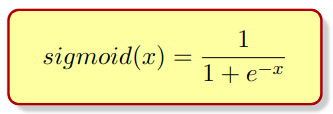

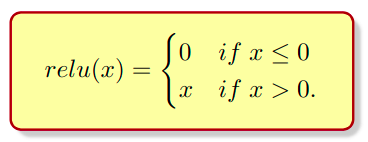

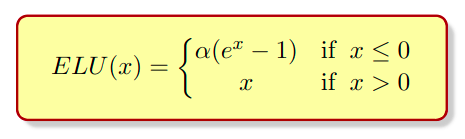

- Input:
    - Người dùng nhập giá trị **x**
    - Người dùng nhập tên **activation function chỉ có 3 loại (sigmoid, relu, elu)**
- Output: Kết quả **f(x)** (x khi đi qua actiavtion fucntion tương ứng theo activation function name). Ví dụ **nhập x=3, activation_function = 'relu'. Output: print 'relu: f(3)=3'**

**NOTE: Lưu ý các điều kiện sau:**
- Dùng function **is_number** được cung cấp sẵn để **kiểm tra x có hợp lệ hay không** (vd: x='10', is_number(x) sẽ trả về True ngược lại là False). Nếu **không hợp lệ print 'x must be a number' và dừng chương trình.**
- Kiểm tra **activation function name có hợp lệ hay không nằm trong 3 tên (sigmoid, relu, elu)**. **Nếu không print 'ten_function_user is not supported'** (vd người dùng nhập 'belu' thì print 'belu is not supportted')
- Convert **x** sang **float** type
- Thực hiện với theo công thức với activation name tương ứng. Print ra kết quả
- Dùng math.e để lấy số e
- $\alpha$ = 0.01

In [20]:
import math

### question 2

In [30]:
# Given
def is_number(n):
    try:
        float(n)
    except ValueError:
        return False
    return True

In [46]:
def exercise2():
    x = input("Input x = ")
    print(f"Input x = {x}")
    if(is_number(x) == False):
        return 'x must be a number'
    activation_function = input("Input activation Function (sigmoid|relu|elu): ")
    print(f"Input activation Function (sigmoid|relu|elu): {activation_function}")
    if(activation_function not in ['sigmoid', 'elu', 'relu']):
        return f'{activation_function} is not supported'
    x = float(x)
    if(activation_function == 'sigmoid'):
        result = 1 / (1 + math.e**(-x))
    elif(activation_function == 'relu'):
        if(x <= 0):
            result = 0.0
        if(x > 0):
            result = x
    elif(activation_function == 'elu'):
        if(x <= 0):
            result = (math.e**x - 1)*0.01
        if(x > 0):      
            result = x
    print(f'{activation_function}: f({x}) = {result}') 


In [47]:
exercise2()

Input x = 1.5
Input activation Function (sigmoid|relu|elu): sigmoid
sigmoid: f(1.5) = 0.8175744761936437


In [48]:
exercise2()

Input x = abc


'x must be a number'

In [49]:
exercise2()

Input x = 1.5
Input activation Function (sigmoid|relu|elu): belu


'belu is not supported'

## Exercise3

Viết function lựa chọn regression loss function để tính loss:
- MAE = $ \dfrac{1}{n}∑_{i=1}^{n} |y_{i} - \hat{y}_{i}| $
- MSE = $ \dfrac{1}{n}∑_{i=1}^{n} (y_{i} - \hat{y}_{i})^2 $
- RMSE = $\sqrt{MSE}$ = $ \sqrt{\dfrac{1}{n}∑_{i=1}^{n} (y_{i} - \hat{y}_{i})^2} $
- **n** chính là **số lượng samples (num_samples)**, với **i** là mỗi sample cụ thể. Ở đây các bạn có thể hiểu là cứ mỗi **i** thì sẽ **có 1 cặp  $y_i$ là target và $\hat{y}$ là predict**.
- Input:
    - Người dùng **nhập số lượng sample (num_samples) được tạo ra (chỉ nhận integer numbers)**
    - Người dùng **nhập loss name (MAE, MSE, RMSE-(optional)) chỉ cần MAE và MSE, bạn nào muốn làm thêm RMSE đều được**.
        
- Output:
    - Print ra **loss name, sample, predict, target, loss**
        - **loss name:** là loss mà người dùng chọn
        - **sample:** là thứ tự sample được tạo ra (ví dụ num_samples=5, thì sẽ có 5 samples và mỗi sample là sample-0, sample-1, sample-2, sample-3, sample-4)
        - **predict:** là số mà model dự đoán (chỉ cần dùng random tạo random một số trong range [0,10))
        - **target:** là số target mà momg muốn mode dự đoán đúng (chỉ cần dùng random tạo random một số trong range [0,10))
        - **loss:** là kết quả khi đưa predict và target vào hàm loss
        - **note:** ví dụ num_sample=5 thì sẽ có 5 cặp predict và target.

**Note: Các bạn lưu ý**
- Dùng **.isnumeric() method** để kiểm tra **num_samples** có hợp lệ hay không (vd: x='10', num_samples.isnumeric() sẽ trả về True ngược lại là False). Nếu **không hợp lệ print 'number of samples must be an integer number'** và dừng chương trình.
- **Dùng vòng lặp for, lặp lại num_samples lần**. **Mỗi lần dùng random modules tạo một con số ngẫu nhiên trong range [0.0, 10.0) cho predict và target**. Sau đó predict và target vào loss function và print ra kết quả mỗi lần lặp.
- Dùng **random.uniform(0,10)** để tạo ra một số ngẫu nhiên trong range [0,10)
- **Giả xử người dùng luôn nhập đúng loss name MSE, MAE, và RMSE (đơn giảng bước này để các bạn không cần check tên hợp lệ)**
- Dùng abs() để tính trị tuyệt đối ví dụ abs(-3) sẽ trả về 3
- Dùng math.sqrt() để tính căn bậc 2

In [51]:
import random
import math

In [56]:
def exercise3():
    num_samples = input("Input number of samples (integer number) which are generated: ")
    print(f"Input number of samples (integer number) which are generated: {num_samples}")
    if not num_samples.isnumeric():
        print("number of samples must be an integer number")
        return
    else:
        loss_name = input("Input loss name: ")
        print(f"Input loss name: {loss_name}")
        num_samples = int(num_samples)
        for i in range(num_samples):
            y_pred = random.uniform(0.0, 10.0)
            y_target = random.uniform(0.0, 10.0)
            if(loss_name == 'MSE'):
                loss = (y_target - y_pred)**2
            elif(loss_name == 'MAE'):
                loss = abs(y_target - y_pred)
            elif(loss_name == 'RMSE'):
                loss = math.sqrt((y_target - y_pred)**2)
            print(f'loss name: {loss_name} ,sample: {i}, pred: {y_pred}, target: {y_target}, loss: {loss}')
            

In [57]:
exercise3()

Input number of samples (integer number) which are generated: 5
Input loss name: RMSE
loss name: RMSE ,sample: 0, pred: 7.7330151930472475, target: 6.292699660638272, loss: 1.4403155324089756
loss name: RMSE ,sample: 1, pred: 7.714786036392222, target: 9.035656693447468, loss: 1.320870657055246
loss name: RMSE ,sample: 2, pred: 5.650174248533276, target: 8.509549537188061, loss: 2.8593752886547845
loss name: RMSE ,sample: 3, pred: 5.0770360125133065, target: 4.598849617895367, loss: 0.4781863946179392
loss name: RMSE ,sample: 4, pred: 1.1011078315661216, target: 2.195468534107702, loss: 1.0943607025415805


## Exercise4

Viết 4 functions để ước lượng các hàm số sau.
-  Input: x (số muốn tính toán) và n (số lần lặp muốn xấp xỉ)
- Output: Kết quả ước lượng hàm tương ứng với x. Ví dụ hàm cos(x=0) thì output = 1

**NOTE: Các bạn chú ý các điều kiện sau**
- x là radian
- n là số nguyên dương > 0
- các bạn nên viết một hàm tính giai thừa riêng



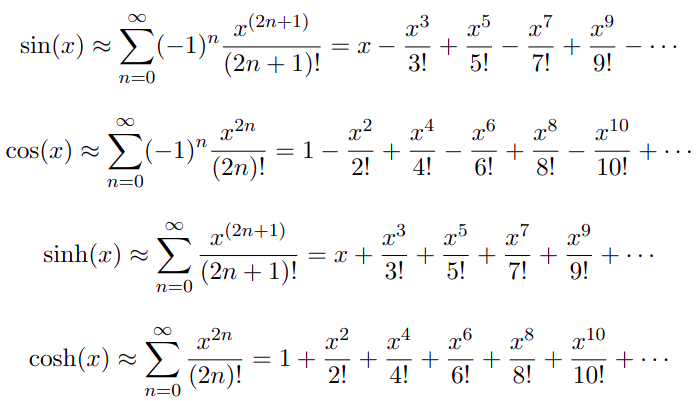

### question 9

In [58]:
def approx_cos(x, n):
    # Your code here
    result = 0
    for i in range(n):
        term = ((-1)**i)*(x**(2*i))/math.factorial(2*i)
        result += term
    return result
    # End your code

assert round(approx_cos(x=1, n=10), 2)==0.54

In [59]:
print(round(approx_cos(x=3.14, n=10), 2))

-1.0


In [60]:
approx_cos(x=3.14, n=10)


-0.9999987352210833

### question 10

In [61]:
def approx_sin(x, n):
    # Your code here
    result = 0
    for i in range(n):
        term = (-1)**i * (x**(2*i+1))/math.factorial(2*i+1)
        result += term
    return result

assert round(approx_sin(x=1, n=10), 4)==0.8415

In [62]:
print(round(approx_sin(x=3.14, n=10), 4))

0.0016


In [63]:
approx_sin(x=3.14, n=10)


0.001592652393160744

### question 11

In [66]:
def approx_sinh(x, n):
    # Your code here
    result = 0
    for i in range(n):
        term = x**(2*i+1)/math.factorial(2*i+1)
        result += term
    return result
    # End your code

assert round(approx_sinh(x=1, n=10), 2)==1.18

In [67]:
print(round(approx_sinh(x=3.14, n=10), 2))

11.53


In [68]:
approx_sinh(x=3.14, n=10)


11.530292029865986

### question 12


In [69]:
def approx_cosh(x, n):
    # Your code here
    result = 0
    for i in range(n):
        term = x**(2*i)/math.factorial(2*i)
        result += term     
    return result
    # End your code
assert round(approx_cosh(x=1, n=10), 2)==1.54

In [70]:
print(round(approx_cosh(x=3.14, n=10), 2))

11.57


In [71]:
approx_cosh(x=3.14, n=10)


11.573574824666185

## Exercise5

**Viết function thực hiện Mean Difference of $n^{th}$ Root Error:**
 là một kỹ thuật thông dụng trong các ứng dụng như phát hiện và theo dõi đối tượng. Ngoài ra, phương pháp này cũng có thể được áp dụng cho các bài toán hồi quy khác. Cụ thể, chúng ta sẽ tính căn bậc \( n \) của cả \( y_i \) và \( \hat{y}_i \) trước khi tính toán hàm lỗi, theo công thức sau:

$$
\text{MD_nRE} = \frac{1}{m} \sum_{i=1}^m \left( \sqrt[n]{y_i} - \sqrt[n]{\hat{y}_i} \right)^p,
$$

trong đó, căn bậc  $n$ được áp dụng cho cả $y_i$ và $\hat{y}_i$ trước khi tính loss, và $p$ đại diện cho bậc của hàm loss.

Pham vi của bài tập chỉ yêu cầu các bạn viết hàm tính Different of $n^{th}$ Root Error cho một cặp $y$ và $\hat{y}$, và giả sử  rằng các điều kiện input đầu vào đều được đáp ứng để đơn giản hoá vấn đề

$$
 (\sqrt[n]{y} - \sqrt[n]{\hat{y}})^p
$$

- Input: y (giá trị của $y$), y\_hat (gía trị của $\hat{y}$), n (căn bậc n), và p (bậc của hàm loss)  
- Output: Kết quả của hàm loss


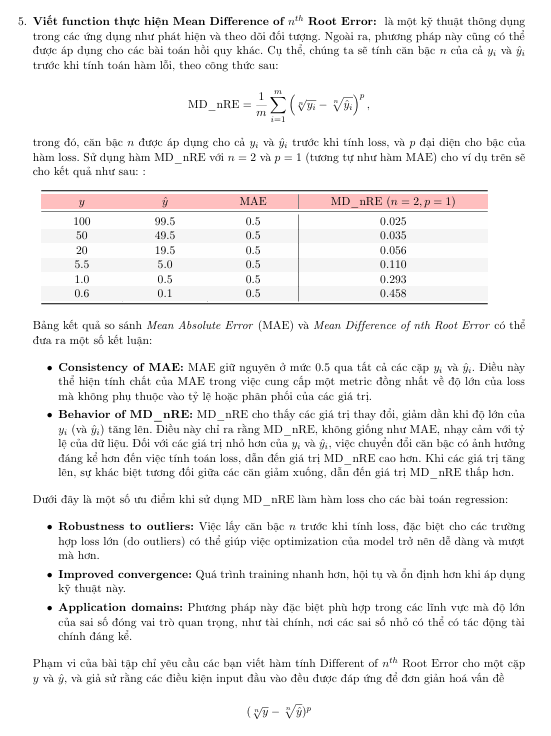

In [72]:
def md_nre_single_sample(y, y_hat, n, p):
    # Your code here
    return (y**(1/n) - y_hat**(1/n))**p
    # End your code

In [73]:
md_nre_single_sample(y=100, y_hat=99.5, n=2, p=1)

0.025031328369998107

In [74]:
md_nre_single_sample(y=50, y_hat=49.5, n=2, p=1)

0.03544417213033135